In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file="./Data//Removed_null_personality_dataset.csv"
df=pd.read_csv(file)
df.head()

,Unnamed: 0,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report


In [5]:
scaler=StandardScaler()
y=df["Personality"]
X=df.drop("Personality",axis=1)

In [6]:
X_scaled=scaler.fit_transform(X)


In [7]:
model=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42,max_depth=3)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred=model.predict(X_test)

In [9]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9264367816091954


In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       463
           1       0.91      0.93      0.92       407

    accuracy                           0.93       870
   macro avg       0.93      0.93      0.93       870
weighted avg       0.93      0.93      0.93       870



In [11]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))


Train accuracy: 0.9384236453201971
Test accuracy: 0.9264367816091954


In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7, 10, 15],
    'n_estimators': [50,100,150, 200]
}

grid = GridSearchCV(RandomForestClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'max_depth': 3, 'n_estimators': 50}
Best score: 0.9379310344827585


In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5)
print("CV Accuracy: %.2f ± %.2f" % (scores.mean(), scores.std()))


CV Accuracy: 0.93 ± 0.02


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict_proba(X_test)
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_model.predict(X_test)))
print("Log Loss:", log_loss(y_test, log_preds))

🔹 Logistic Regression
Accuracy: 0.9264367816091954
Log Loss: 0.2505701048438796


log  0.9267250757531535
0.9267250757531535


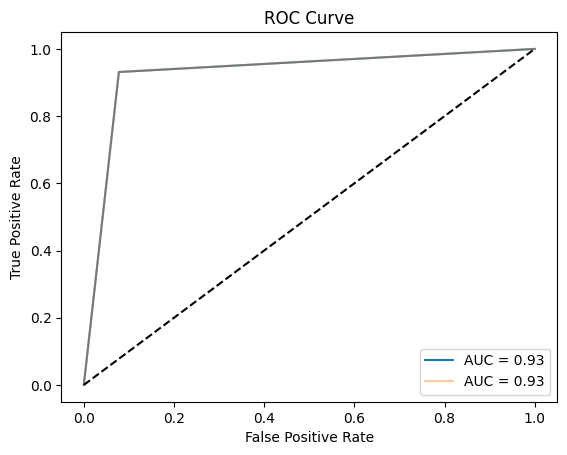

In [15]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,y_pred)
auc=roc_auc_score(y_test,y_pred)
log_p=log_model.predict(X_test)
log_fpr,log_tpr,log_threshold=roc_curve(y_test,log_p)
log_auc=roc_auc_score(y_test,log_p)
print("log ",log_auc)
print(auc)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot(log_fpr, log_tpr, label=f"AUC = {log_auc:.2f}",alpha=0.4)
plt.plot([0, 1], [0, 1], 'k--')  # random guessing line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [19]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1
2,9.0,1,1.0,2.0,1,5.0,2.0,1
3,0.0,0,6.0,7.0,0,14.0,8.0,0
4,3.0,0,9.0,4.0,0,8.0,5.0,0


In [24]:
df.at[(df["Personality"]==1),"Time_spent_Alone"] #it is same as loc function

InvalidIndexError: 0       False
1        True
2        True
3       False
4       False
        ...  
2895    False
2896    False
2897     True
2898     True
2899    False
Name: Personality, Length: 2900, dtype: bool

In [25]:
df.loc[(df["Personality"]==1),"Time_spent_Alone"]

1        9.0
2        9.0
8       10.0
11      10.0
14       6.0
        ... 
2891     6.0
2892     9.0
2893     9.0
2897     4.0
2898    11.0
Name: Time_spent_Alone, Length: 1409, dtype: float64